# IMAGE CLASSIFICATION USING CIFAR-10 DATASET: A COMPARISON OF MANHATTAN (L1) AND EUCLIDEAN (L2) DISTANCES WITH 5-FOLD CROSS-VALIDATION

## Importing Required Libraries

In [5]:
import os
import cv2 as cv
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Loading Images and Printing Different Classes of the Dataset

In [6]:
TRAIN_DIR = 'D:/Semester 10/CVPR/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
    image_path = os.path.join(TRAIN_DIR, c)
    
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Loading the Training Images 

In [7]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [01:20<00:00, 62.37it/s] 

50000


In [8]:
image_shapes = set() 
total_images = 0 

for img in tqdm(os.listdir(path)):
    img_path = os.path.join(path, img) 
    img_array = cv.imread(img_path) 

    
    if img_array is not None:
        total_images += 1
        image_shapes.add(img_array.shape)
    else:
        print(f"Failed to load {img}")

if len(image_shapes) == 1:
    shape = image_shapes.pop()  
    print(f"All {total_images} images have the same shape: {shape}")
else:
    print("Images have different shapes.")

print("Total number of images:", total_images)

100%|██████████| 5000/5000 [00:00<00:00, 6522.68it/s]

All 5000 images have the same shape: (32, 32, 3)
Total number of images: 5000


## Converting Image to Gray-Scale Image and Showing their Dimension

In [9]:
image_gray_list = []
for image_data, class_label in TRAIN_DATA:
    image_gray = cv.cvtColor(image_data, cv.COLOR_BGR2GRAY)
    image_gray_list.append((image_gray, class_label))

print(f'Total Number of Images {len(image_gray_list)}')  # Total number of grayscale images

# Check if all images have the same dimensions and print the dimensions
first_image_shape = image_gray_list[0][0].shape
same_dimensions = all(image_gray.shape == first_image_shape for image_gray, _ in image_gray_list)

if same_dimensions:
    print("All images have the same dimensions:", first_image_shape)
else:
    print("Images have different dimensions")


Total Number of Images 50000
All images have the same dimensions: (32, 32)


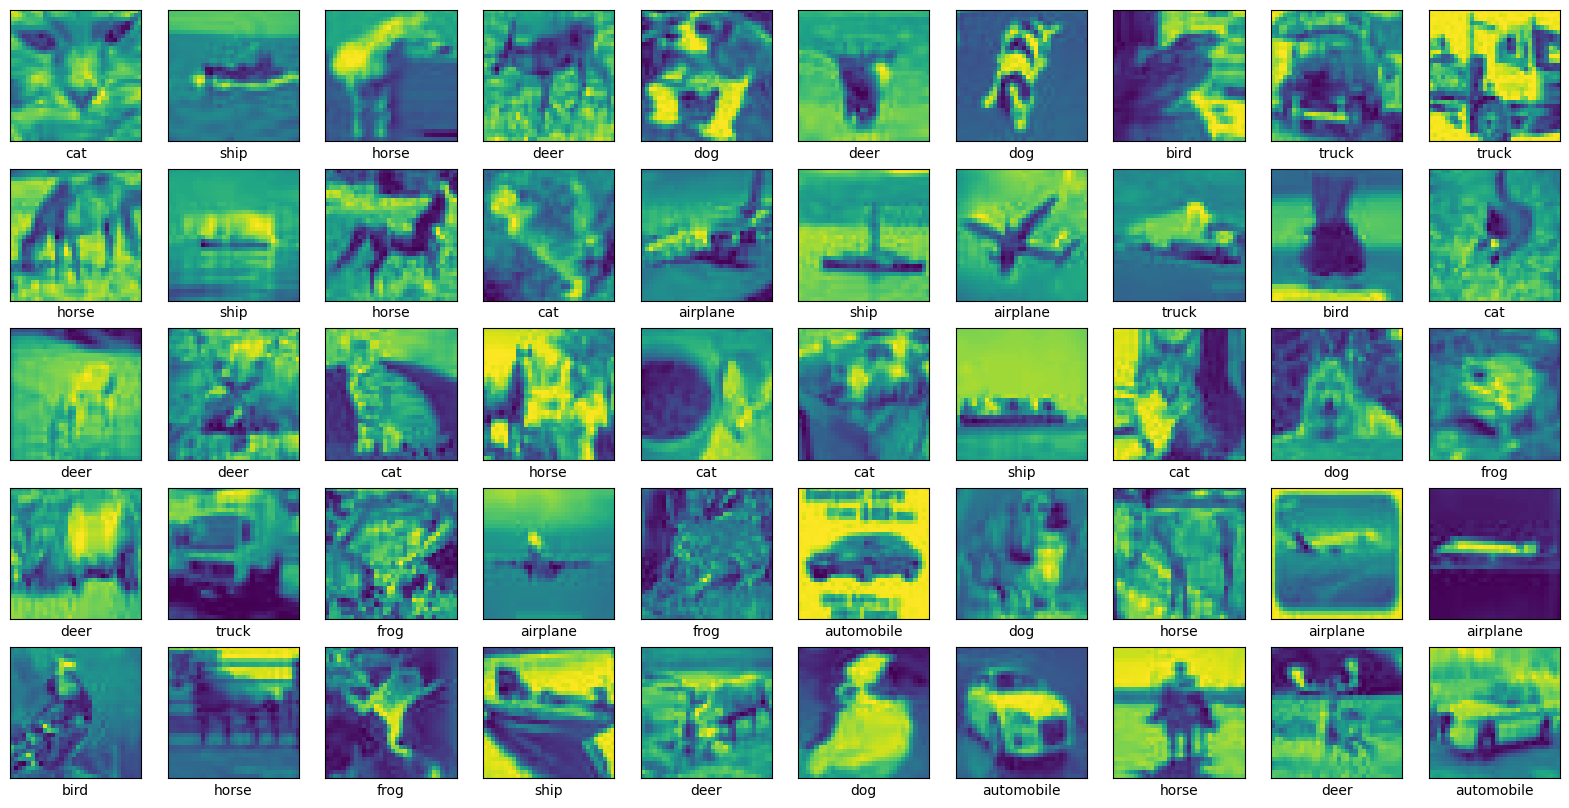

In [46]:
random.shuffle(image_gray_list)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(image_gray_list[i][0])
    plt.xlabel(CATEGORIES[image_gray_list[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

## Dividing Training Images into 5 Folds 

In [15]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [37]:
import numpy as np
import matplotlib.pyplot as plt

k_max = 20

def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

for k in range(1, k_max+1, 2):
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    
    for i in range(5):
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4

        acc_l1 = 0
        acc_l2 = 0

        for v, _ in tqdm(validation):
            l1_dists = []
            l2_dists = []
            for t, _ in train:
                l1 = l1_dist(v, t)
                l2 = l2_dist(v, t)
                l1_dists.append((l1, t[1]))
                l2_dists.append((l2, t[1]))
            l1_dists.sort(key=lambda x: x[0])
            l2_dists.sort(key=lambda x: x[0])

            neighbors_l1 = [d[1] for d in l1_dists[:k]]
            neighbors_l1 = np.array(neighbors_l1).flatten()
            counts_l1 = np.bincount(neighbors_l1)
            pred_l1 = np.argmax(counts_l1)

            neighbors_l2 = [d[1] for d in l2_dists[:k]]
            neighbors_l2 = np.array(neighbors_l2).flatten()
            counts_l2 = np.bincount(neighbors_l2)
            pred_l2 = np.argmax(counts_l2)

            if np.all(pred_l1 == v[1]):
                acc_l1 += 1
            if np.all(pred_l2 == v[1]):
                acc_l2 += 1

        fold_accuracies_l1.append(acc_l1 / len(validation))
        fold_accuracies_l2.append(acc_l2 / len(validation))

    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))

100%|██████████| 1000/1000 [03:06<00:00,  5.36it/s]


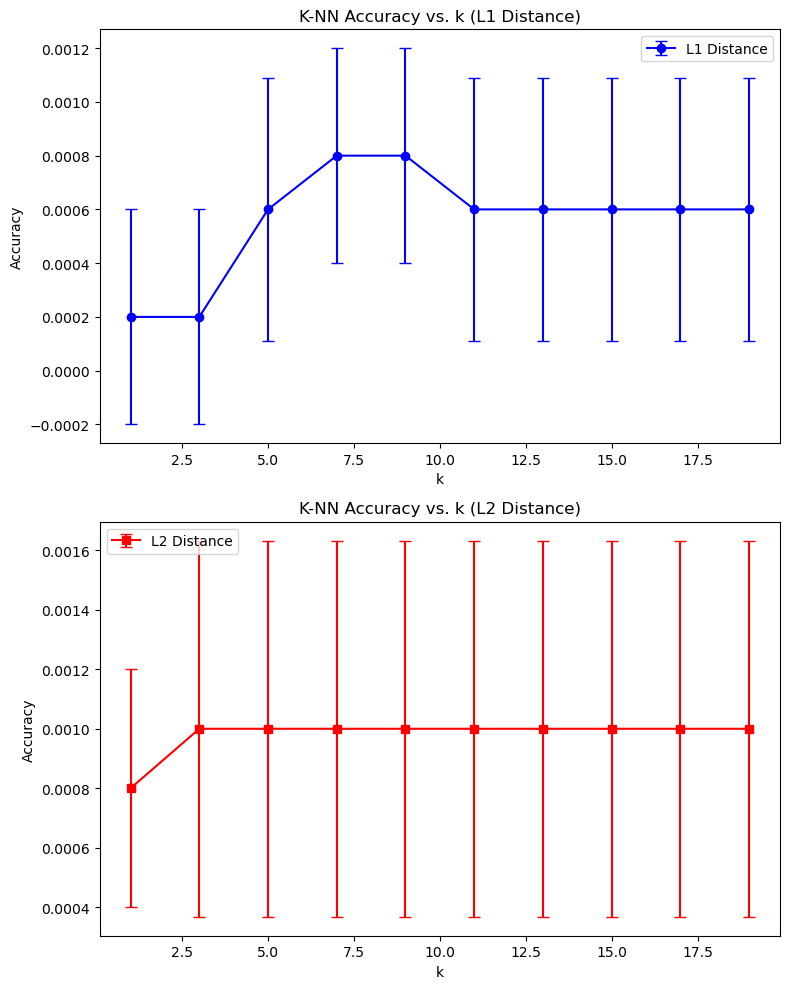

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# L1 Distance
axs[0].errorbar(range(1, k_max+1, 2), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", marker='o', linestyle='-', capsize=4, color='blue')
axs[0].set_xlabel("k")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("K-NN Accuracy vs. k (L1 Distance)")
axs[0].legend()

# L2 Distance
axs[1].errorbar(range(1, k_max+1, 2), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", marker='s', linestyle='-', capsize=4, color='red')
axs[1].set_xlabel("k")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("K-NN Accuracy vs. k (L2 Distance)")
axs[1].legend()

plt.tight_layout()
plt.show()

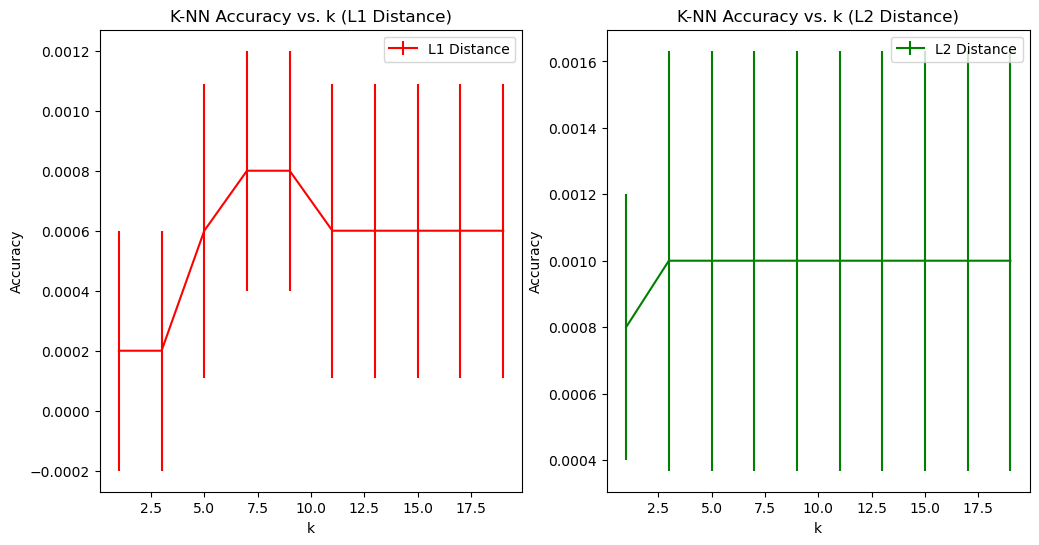

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for L1 distance
ax1.errorbar(range(1, k_max+1,2), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", color="red")
ax1.set_xlabel("k")
ax1.set_ylabel("Accuracy")
ax1.set_title("K-NN Accuracy vs. k (L1 Distance)")
ax1.legend()

# Plot for L2 distance
ax2.errorbar(range(1, k_max+1,2), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", color="green")
ax2.set_xlabel("k")
ax2.set_ylabel("Accuracy")
ax2.set_title("K-NN Accuracy vs. k (L2 Distance)")
ax2.legend()

plt.show()

## Discussion

##### 1.After Converting the CIFAR-10 dataset image to gray-scale image the dataset consists of 32x32 grayscale images, representing different objects and animals. The dataset's characteristics, such as the size and resolution of the images, can influence the performance of distance calculation techniques

##### 2. Gray-Scale CIFAR-10 uses pixel intensities in grayscale images, with L1 and L2 distances capturing feature dissimilarity. L1 distance is more robust to outliers and noise, while L2 distance considers squared differences, capturing smooth transitions in grayscale images. 

##### 3.Manhattan and Euclidean distances have limitations in complex image classification tasks, as they assume equal importance of features. 

#### 4. We got the highest accuracy from the l2. Where the K accuracy is 0.10.